In [1]:
#imports
import sys
import os
from os.path import join
import glob
import pandas as pd
import numpy as np
import time
%load_ext autoreload

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# load data
dataroot = '/content/drive/MyDrive/IDS(attacks&Defense)'
SEED=2

In [4]:
df_data=pd.read_csv("/content/drive/MyDrive/CICIDS2017/data_set.csv")
df_data.shape

(2830743, 79)

In [5]:
df = df_data.sample(frac =.5, random_state = np.random.permutation(len(df_data)))
#df = df_data
print (df.shape)
#df.describe()
del df_data

(1415372, 79)


In [6]:
#df = df[:5000]
#df.shape

In [7]:
#df.info()

In [8]:
#df.head()

In [9]:
# lets count if there is NaN values in our dataframe( AKA missing features)
#we should see `0`
df.isnull().sum().sum()

647

In [10]:
# from matplotlib.pyplot import figure
# figure(figsize=(12, 3), dpi=80)
# df.isna().sum().plot(kind='bar')

In [11]:
q1 = df.loc[df['Label'] == 'Web Attack-Sql Injection'] #[['num','val']]
q1

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
1614224,80,73,1,1,0,0,0,0,0.00,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,Web Attack-Sql Injection
1612058,80,5006127,4,4,447,530,447,0,111.75,223.500000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,Web Attack-Sql Injection
1613336,80,5009041,4,4,523,530,523,0,130.75,261.500000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,Web Attack-Sql Injection
1612135,80,5038618,4,4,537,1881,537,0,134.25,268.500000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,Web Attack-Sql Injection
1613237,80,5006168,4,4,599,2021,599,0,149.75,299.500000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,Web Attack-Sql Injection
1615007,80,73,1,1,0,0,0,0,0.00,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,Web Attack-Sql Injection
1612116,80,42,1,1,0,0,0,0,0.00,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,Web Attack-Sql Injection
1614247,80,5007460,5,3,537,1881,537,0,107.40,240.153701,...,32,0.0,0.0,0,0,0.0,0.0,0,0,Web Attack-Sql Injection


In [12]:
q2 = df.loc[df['Label'] == 'Heartbleed'] #[['num','val']]
q2

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
2735847,444,119299621,2805,2028,13712,7878627,5792,0,4.888414,110.120790,...,32,0.0,0.0,0,0,0.0,0.0,0,0,Heartbleed
2735853,444,119296592,2797,2006,13712,7878088,5792,0,4.902395,110.277907,...,32,0.0,0.0,0,0,0.0,0.0,0,0,Heartbleed
2735576,444,119259012,2801,2069,12264,7879536,4344,0,4.378436,83.107845,...,32,0.0,0.0,0,0,0.0,0.0,0,0,Heartbleed
2735762,444,119257653,2802,2067,20858,7812389,5792,0,7.443969,126.045811,...,32,0.0,0.0,0,0,0.0,0.0,0,0,Heartbleed
2735249,444,119261118,2794,2130,12264,7879536,4344,0,4.389406,83.211635,...,32,0.0,0.0,0,0,0.0,0.0,0,0,Heartbleed


In [13]:
q3 = df.loc[df['Label'] == 'Infiltration'] #[['num','val']]
q3

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
1441063,444,111406728,21,21,4584,126,705,6,218.285714,254.824870,...,20,5.832270e+05,1.907774e+03,584576,581878,54800000.0,1.449569e+03,54800000,54800000,Infiltration
1316859,444,119995180,1819,1817,489184,10902,1271,6,268.930181,265.650639,...,20,5.863632e+06,4.482322e+06,9355307,809115,14700000.0,1.610000e+07,33200000,5108213,Infiltration
1299546,444,42664070,5,6,141,291,93,0,28.200000,38.861292,...,20,0.000000e+00,0.000000e+00,0,0,0.0,0.000000e+00,0,0,Infiltration
1399506,444,25009948,34,32,13504,192,1460,6,397.176471,509.461122,...,20,5.045921e+06,0.000000e+00,5045921,5045921,19400000.0,0.000000e+00,19400000,19400000,Infiltration
1384003,444,101086101,25,25,5821,150,1181,6,232.840000,369.048515,...,20,5.698800e+05,1.494452e+04,582609,553425,32900000.0,1.910000e+07,55000000,21800000,Infiltration
1310743,444,78233714,48,52,12042,586,1460,0,250.875000,422.794534,...,20,2.024844e+06,3.093999e+06,7461188,3051,13600000.0,1.020000e+07,29500000,5662979,Infiltration
1310608,444,119993844,3813,3811,1752551,22866,1271,6,459.625229,246.730937,...,20,0.000000e+00,0.000000e+00,0,0,0.0,0.000000e+00,0,0,Infiltration
1321496,444,18897509,8,0,7366,0,1460,6,920.750000,634.234015,...,20,9.296999e+06,0.000000e+00,9296999,9296999,9600510.0,0.000000e+00,9600510,9600510,Infiltration
1306797,444,119973135,4376,4374,2321478,26244,1273,6,530.502285,262.768815,...,20,0.000000e+00,0.000000e+00,0,0,0.0,0.000000e+00,0,0,Infiltration
1367615,444,69714525,20,20,3737,120,705,6,186.850000,227.161032,...,20,5.575790e+05,1.131371e+01,557587,557571,34000000.0,2.970000e+07,55000000,13000000,Infiltration


In [14]:
df_label = df['Label']

In [15]:
# change the label column
df_label = df_label.replace({ 'Web Attack-Sql Injection' : 'Web Attack', 
                               'Heartbleed' : 'Web Attack',
                               'Infiltration' : 'Web Attack',
                               'Web Attack-Brute Force' : 'Web Attack',
                               'Web Attack-XSS' : 'Web Attack'
                               })

In [16]:
# dropping bad columns, they coause issues due to large numbers
data = df.drop(columns=['Flow Packets/s','Flow Bytes/s', 'Label'])
del df

#filling missing features
data.fillna(data.mean(), inplace=True)

#convert data to numeric
data = data.astype(float).apply(pd.to_numeric)

# lets count if there is NaN values in our dataframe( AKA missing features)
#we should see `0`
data.isnull().sum().sum()

0

In [17]:
# print label distribution
pd.DataFrame(df_label.value_counts()).to_csv('class_distribution.csv')
df_label.value_counts()

BENIGN              1136578
DoS Hulk             115507
PortScan              79403
DDoS                  64022
DoS GoldenEye          5197
FTP-Patator            3973
SSH-Patator            2918
DoS slowloris          2900
DoS Slowhttptest       2788
Web Attack             1110
Bot                     976
Name: Label, dtype: int64

In [18]:
label_names = pd.Series(df_label, name='Label').unique()
label_names

array(['BENIGN', 'DoS Hulk', 'FTP-Patator', 'DDoS', 'PortScan',
       'SSH-Patator', 'DoS GoldenEye', 'DoS slowloris',
       'DoS Slowhttptest', 'Bot', 'Web Attack'], dtype=object)

In [19]:
#,'Infiltration' ,'Web Attack-Sql Injection',

In [20]:
len (label_names)

11

In [21]:
data.shape

(1415372, 76)

# Data Imbalance

In [22]:
def make_value2index(attacks):
    #make dictionary
    attacks = sorted(attacks)
    d = {}
    counter=0
    for attack in attacks:
        d[attack] = counter
        counter+=1
    return d

In [23]:
# chganges label from string to integer/index
def encode_label(Y_str):
    labels_d = make_value2index(np.unique(Y_str))
    Y = [labels_d[y_str] for y_str  in Y_str]
    Y = np.array(Y)
    return np.array(Y)

In [24]:
X = data.values
y = encode_label(df_label.values)

del data

In [25]:
# normalization
def normalize(data):
    data = data.astype(np.float32)       
    eps = 1e-15
    mask = data==-1
    data[mask]=0
    mean_i = np.mean(data,axis=0)
    min_i = np.min(data,axis=0) #  to leave -1 (missing features) values as is and exclude in normilizing
    max_i = np.max(data,axis=0)
    r = max_i-min_i+eps
    data = (data-mean_i)/r  # zero centered 
    #deal with missing features -1
    data[mask] = 0        
    return data

In [26]:
X = normalize(X)

In [27]:
def reshape_dataset_cnn(x: np.ndarray) -> np.ndarray:
    # Add padding columns    
    result = np.zeros((x.shape[0], 81))
    result[:, :-5] = x

    # Reshaping dataset
    result = np.reshape(result, (result.shape[0] ,-1, 9, 9 ))
    #result = result[..., tf.newaxis]
    return result

In [28]:
X = reshape_dataset_cnn(X)
X.shape , y.shape

((1415372, 1, 9, 9), (1415372,))

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)
X_train.shape , y_train.shape , X_test.shape , y_test.shape

((1132297, 1, 9, 9), (1132297,), (283075, 1, 9, 9), (283075,))

In [30]:
import torch
# setting device on GPU if available, else CPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)

Using device: cpu


# CNN Model

In [31]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
import torch.optim.lr_scheduler as lr_scheduler
import torch.backends.cudnn as cudnn
from torch.autograd import Variable
from torch.utils.data import TensorDataset

from tqdm import tqdm
import torch.nn.functional as F

In [32]:
class MnistCNN(nn.Module):

    def __init__(self,input_dim,num_classes):
        super(MnistCNN, self).__init__()
        self.input_dim = input_dim
        self.num_classes = num_classes
        
        self.conv1 = nn.Conv2d(1, 32, 3,1)
        self.conv2 = nn.Conv2d(32, 64, 3 ,1)
        self.fc3 = nn.Linear(64, 64)
        #self.fc4 = nn.Linear(128, 10)
        self.fc4 = nn.Linear(input_dim*64,num_classes)
        #fc_layers.append(nn.Linear(input_dim*128,num_classes))
        
    def forward(self, x):    
        h = F.relu(self.conv1(x))        
        h = F.relu(self.conv2(h))        
        h = F.dropout2d(F.max_pool2d(h, 5), p=0.25)
        h = F.dropout2d(self.fc3(h.view(h.size(0), -1)), p=0.5)
        h = self.fc4(h)
        return F.log_softmax(h,dim=1)
    

class CifarCNN(nn.Module):

    def __init__(self , num_classes):
        super(CifarCNN, self).__init__()
        self.num_classes = num_classes
        self.conv1 = nn.Conv2d(1, 64, 3, padding=1)
        self.bn1 = nn.BatchNorm2d(64)
        self.conv2 = nn.Conv2d(64, 64, 3, padding=2)
        self.bn2 = nn.BatchNorm2d(64)
        self.conv3 = nn.Conv2d(64, 128, 3, padding=2)
        self.bn3 = nn.BatchNorm2d(128)
        self.conv4 = nn.Conv2d(128, 128, 3, padding=2)
        self.bn4 = nn.BatchNorm2d(128)
        self.fc5 = nn.Linear(512, 256)
        self.fc6 = nn.Linear(256, 256)
        self.fc7 = nn.Linear(256, num_classes)

    def forward(self, x):
        h = F.relu(self.bn1(self.conv1(x)))        
        h = F.relu(self.bn2(self.conv2(h)))        
        h = F.max_pool2d(h, 2)        
        h = F.relu(self.bn3(self.conv3(h)))   
        h = F.max_pool2d(h, 2)        
        h = F.relu(self.bn4(self.conv4(h)))        
        h = F.max_pool2d(h, 2)        
        h = F.relu(self.fc5(h.view(h.size(0), -1)))
        h = F.relu(self.fc6(h))
        h = self.fc7(h)
        return F.log_softmax(h,dim=1)
    
class Generator(nn.Module):

    def __init__(self, in_ch):
        super(Generator, self).__init__()
        self.conv1 = nn.Conv2d(in_ch, 64, 3, stride=2 , padding=1) 
        self.bn1 = nn.BatchNorm2d(64)
        self.conv2 = nn.Conv2d(64, 128, 3, stride=2 , padding=1) 
        self.bn2 = nn.BatchNorm2d(128)
        self.deconv3 = nn.ConvTranspose2d(128, 64, 3, stride=2 , padding=1) 
        self.bn3 = nn.BatchNorm2d(64)
        self.deconv4 = nn.ConvTranspose2d(64, in_ch, 3, stride=2 , padding=1) 

    def forward(self, x):
        h = F.leaky_relu(self.bn1(self.conv1(x)))
        h = F.leaky_relu(self.bn2(self.conv2(h)))
        h = F.leaky_relu(self.bn3(self.deconv3(h)))        
        h = torch.tanh(self.deconv4(h))        
        return h

class Discriminator(nn.Module):

    def __init__(self, in_ch):
        super(Discriminator, self).__init__()
        self.conv1 = nn.Conv2d(in_ch, 64, 1, stride=2)
        self.conv2 = nn.Conv2d(64, 128, 1, stride=2)
        self.bn2 = nn.BatchNorm2d(128)
        self.conv3 = nn.Conv2d(128, 256, 1, stride=2)
        self.bn3 = nn.BatchNorm2d(256)
        if in_ch == 1:
            self.fc4 = nn.Linear(1024, 1)            
        else:
            self.fc4 = nn.Linear(2304, 1)

    def forward(self, x):
        h = F.leaky_relu(self.conv1(x))
        h = F.leaky_relu(self.bn2(self.conv2(h)))
        h = F.leaky_relu(self.bn3(self.conv3(h)))        
        h = torch.sigmoid(self.fc4(h.view(h.size(0), -1)))
        return h

In [33]:
def accuracy(y, t):
    pred = y.data.max(1, keepdim=True)[1]
    acc = pred.eq(t.data.view_as(pred)).cpu().sum()
    return acc

In [34]:
def fgsm(model, x, t, loss_func, eps, min=0, max=1):
    if not isinstance(x, Variable):
        x, t = Variable(x.cuda(), requires_grad=True), Variable(t.cuda())
    x.requires_grad = True
    y = model(x)
    loss = loss_func(y, t)
    model.zero_grad()
    loss.backward(retain_graph=True)

    return Variable(torch.clamp(x.data + eps * torch.sign(x.grad.data), min=min, max=max))


In [35]:
len(np.unique(df_label))

11

In [36]:
data ="minst"
epochs = 10
lr= 0.01
milestones = [50, 75]
gamma = 0.8
batch_size = 128
input_dim = X_train.shape[1]
## num_class = len(np.unique(df_label))
num_class = 11
eps = 0.30

gan_path ="/content/drive/MyDrive/IDS(attacks&Defense)/checkpoint/CNN_Mnist/3.tar"

In [37]:
input_dim , num_class

(1, 11)

In [38]:
tensor_x_test = torch.stack([torch.Tensor(i) for i in X_test]).to(device)
tensor_y_test = torch.LongTensor(y_test).to(device) 

test_data = TensorDataset(tensor_x_test,tensor_y_test)     
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, shuffle=True)      

In [39]:
model = MnistCNN(input_dim=input_dim  , num_classes=num_class)
print (model)

#model = CifarCNN(num_classes=num_class)
#print (model)

MnistCNN(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=11, bias=True)
)


In [40]:
normal = []
adv = []
ape = []

model_point = torch.load("/content/drive/MyDrive/IDS(attacks&Defense)/models/MnistCNN.tar")
gan_point = torch.load(gan_path)


model.load_state_dict(model_point["state_dict"])

in_ch = 1 #if data == "mnist" else 3

G = Generator(in_ch).to(device)
G.load_state_dict(gan_point["generator"])
loss_cre = nn.CrossEntropyLoss().cuda()

model.eval(), G.eval()
for e in range(epochs):
    normal_acc, adv_acc, ape_acc, n = 0, 0, 0, 0
    for x, t in tqdm(test_loader, total=len(test_loader), leave=False):
        x, t = Variable(x.to(device)), Variable(t.to(device))

        y = model(x)
        normal_acc += accuracy(y, t)

        x_adv = fgsm(model, x, t, loss_cre, eps)
        y_adv = model(x_adv)
        adv_acc += accuracy(y_adv, t)

        x_ape = G(x_adv)
        y_ape = model(x_ape)
        ape_acc += accuracy(y_ape, t)
        n += t.size(0)


    normal_acc_ = normal_acc /n *100
    print (normal_acc_)
    normal.append(normal_acc_)

    adv_acc_ = adv_acc / n * 100
    adv.append(adv_acc_)

    ape_acc_ = ape_acc / n * 100 
    ape.append(ape_acc_)

    print("Accuracy: normal {:.6f}, fgsm {:.6f}, ape {:.6f}".format( normal_acc_ , adv_acc_ , ape_acc_ ) , flush=True)


  0%|          | 0/2212 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)
                                                   

tensor(95.4168)
Accuracy: normal 95.416763, fgsm 27.257088, ape 79.606819


tensor(95.4496)
Accuracy: normal 95.449615, fgsm 27.378258, ape 79.633316


tensor(95.4129)
Accuracy: normal 95.412872, fgsm 27.205158, ape 79.613182


tensor(95.4267)
Accuracy: normal 95.426651, fgsm 27.309725, ape 79.648857


tensor(95.4083)
Accuracy: normal 95.408287, fgsm 27.184668, ape 79.596924


tensor(95.4256)
Accuracy: normal 95.425591, fgsm 27.193499, ape 79.564430


tensor(95.4320)
Accuracy: normal 95.431953, fgsm 27.087521, ape 79.641792


tensor(95.4355)
Accuracy: normal 95.435486, fgsm 27.330566, ape 79.564072


tensor(95.4351)
Accuracy: normal 95.435127, fgsm 27.329859, ape 79.626251


tensor(95.4383)
Accuracy: normal 95.438316, fgsm 27.142984, ape 79.534401


In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

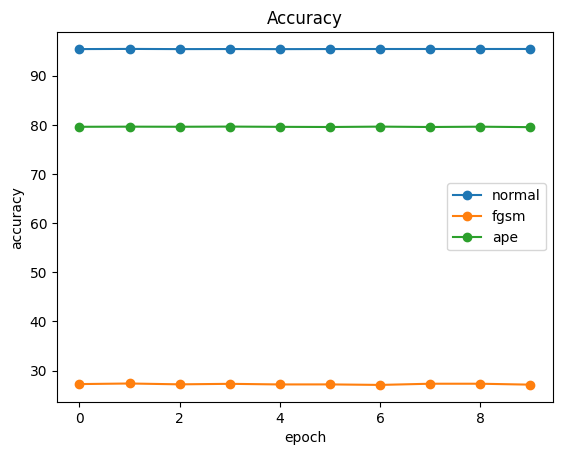

In [42]:
plt.plot(normal,'-o')
plt.plot(adv,'-o')
plt.plot(ape,'-o')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['normal','fgsm','ape'])
plt.title('Accuracy')
 
plt.show()